In [129]:
#import main and neccesary libraries for analysis and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [130]:
#Setting Constraints

%matplotlib inline
sns.set(color_codes=True)

DATA ANALYSIS USING PANDAS



In [131]:
#Locating and Importing dataset file for further Operations into an Dataframe using Pandas

df = pd.read_csv("C:/Users/Shaikh/OneDrive/Desktop/Data Analyst projects/MY_EDA_PROJECT/data.csv")

#Initial five Records of our Dataset:

df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [132]:
# The records from the bottom side of dataset:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [133]:
#Returning the type of data of fields of the dataset
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [134]:
#Dropping Unnecesary Columns which doesnt make lot of sense
df = df.drop(['Market Category','Vehicle Style','Engine Fuel Type','Popularity','Number of Doors','Vehicle Size'],axis=1)

df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [135]:
#Renaming Columns
df = df.rename(columns = {"Make":"Manufacturer","Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-HIGH","city mpg":"MPG-CITY","MSRP":"PRICE"})
df.head(5)

,Manufacturer,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-HIGH,MPG-CITY,PRICE
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [136]:
#ANALYSIS OF DATASET
df.shape
#Duplicate Rows Count

duplicate_rows_df = df[df.duplicated()]
print("No of Duplicate  Rows:",duplicate_rows_df.shape)

df.count

No of Duplicate  Rows: (989, 10)


<bound method DataFrame.count of       Manufacturer       Model  Year     HP  Cylinders Transmission  \
0              BMW  1 Series M  2011  335.0        6.0       MANUAL   
1              BMW    1 Series  2011  300.0        6.0       MANUAL   
2              BMW    1 Series  2011  300.0        6.0       MANUAL   
3              BMW    1 Series  2011  230.0        6.0       MANUAL   
4              BMW    1 Series  2011  230.0        6.0       MANUAL   
...            ...         ...   ...    ...        ...          ...   
11909        Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11910        Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11911        Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11912        Acura         ZDX  2013  300.0        6.0    AUTOMATIC   
11913      Lincoln      Zephyr  2006  221.0        6.0    AUTOMATIC   

              Drive Mode  MPG-HIGH  MPG-CITY  PRICE  
0       rear wheel drive        26        19  46135  
1     

In [137]:
#Dropping Duplicates

df = df.drop_duplicates()

In [138]:
#Total Count After Dropping Duplicates
df.count()

Manufacturer    10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-HIGH        10925
MPG-CITY        10925
PRICE           10925
dtype: int64

In [139]:
#Filtering Out The Columns with Different Records
df.isnull().sum()

Manufacturer     0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-HIGH         0
MPG-CITY         0
PRICE            0
dtype: int64

In [140]:
#Dropping The Null Columns and Rows

df = df.dropna()

df.count()

Manufacturer    10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-HIGH        10827
MPG-CITY        10827
PRICE           10827
dtype: int64

In [141]:
#Displaying Once More to Determine Any Null Row and Column

print(df.isnull().sum())

Manufacturer    0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-HIGH        0
MPG-CITY        0
PRICE           0
dtype: int64


Visualisations Using Matlplotlib & Seaborn


<Axes: xlabel='PRICE'>

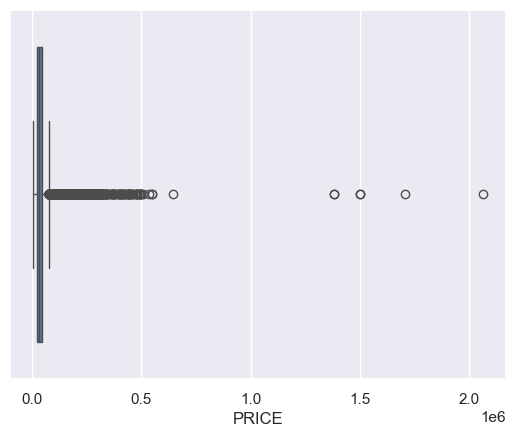

In [142]:
#Analyzing Outliers using BoxPlot
#1st.For Price
sns.boxplot(x=df["PRICE"])

<Axes: xlabel='HP'>

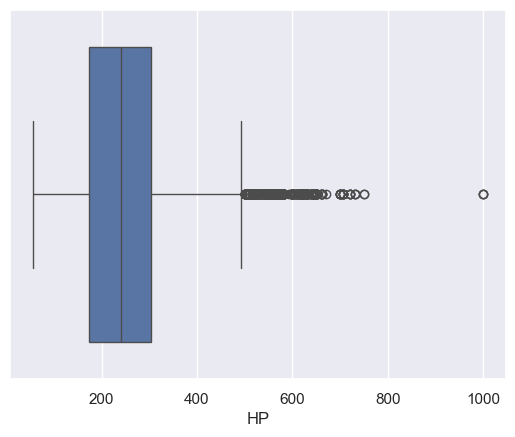

In [143]:
#2nd.For Engine Hp
sns.boxplot(x=df["HP"])

<Axes: xlabel='Cylinders'>

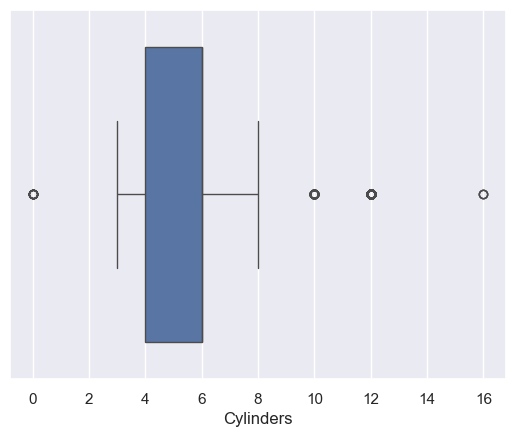

In [144]:
#3rd.For Cylinder
sns.boxplot(x=df["Cylinders"])

More Visualisations Using Histogram and Heatmap

Text(0.5, 0, 'Make of Cars')

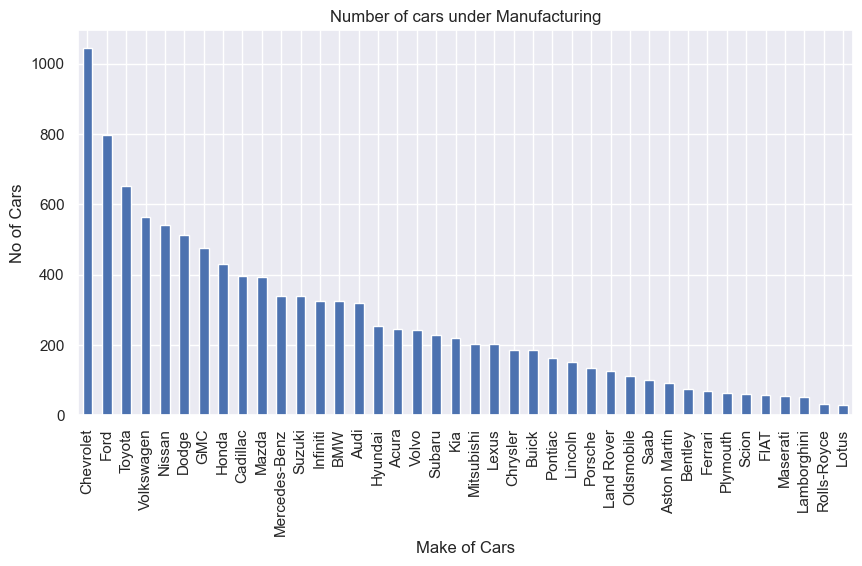

In [145]:
df["Manufacturer"].value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of cars under Manufacturing")
plt.ylabel("No of Cars")
plt.xlabel("Make of Cars")

Text(0.5, 0, 'Make of Cars')

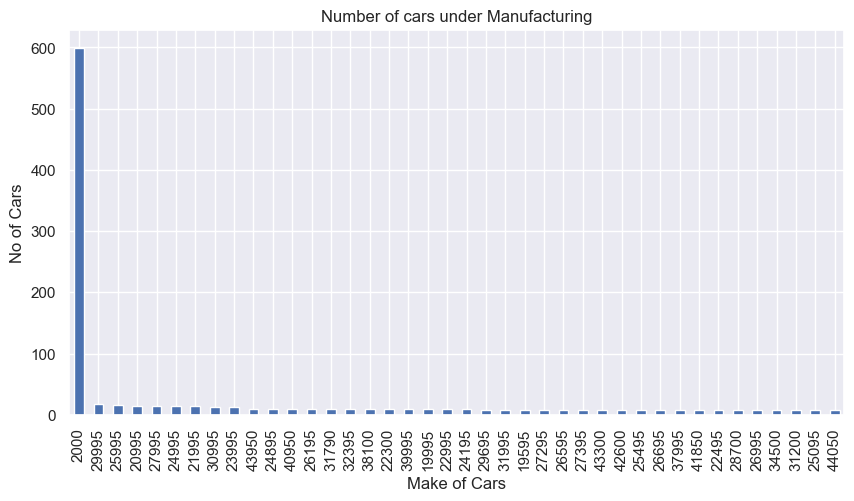

In [146]:
df["PRICE"].value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of cars under Manufacturing")
plt.ylabel("No of Cars")
plt.xlabel("Make of Cars")

,Year,HP,Cylinders,MPG-HIGH,MPG-CITY,PRICE
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-HIGH,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-CITY,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
PRICE,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


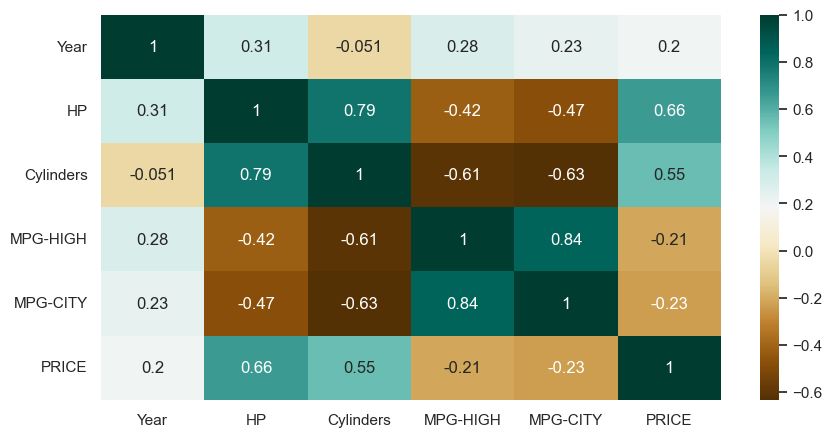

In [147]:
#Heatmap

plt.figure(figsize=(10,5))
data = df.select_dtypes(include=["number"]).corr()
sns.heatmap(data,cmap="BrBG",annot=True)
data

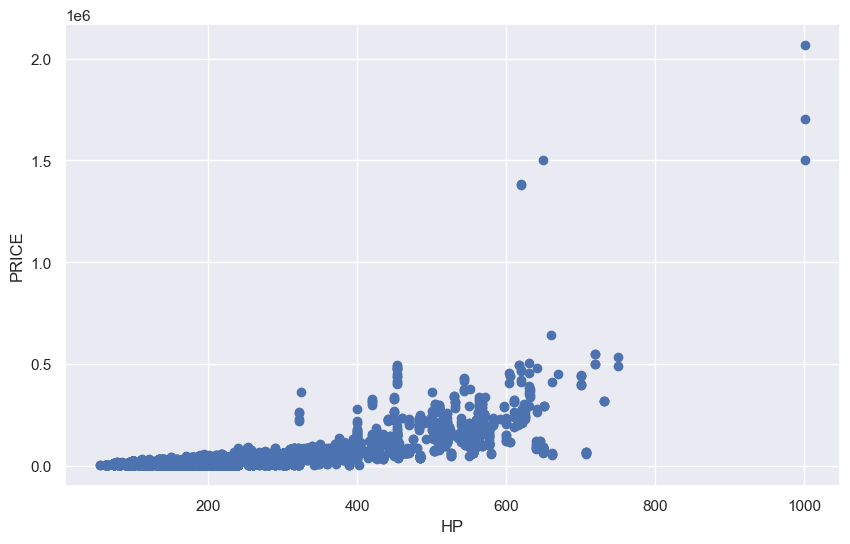

In [148]:
#ScatterPlot
fig, axis = plt.subplots(figsize=(10,6))
axis.scatter(df["HP"], df["PRICE"])
axis.set_xlabel("HP")
axis.set_ylabel("PRICE")
plt.show()

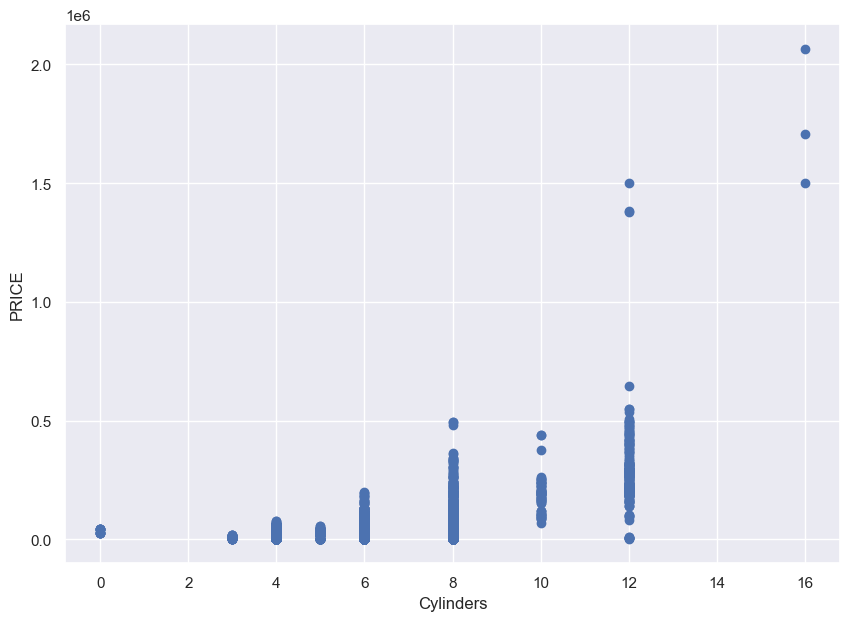

In [150]:
#ScatterPlot
fig,axis=plt.subplots(figsize=(10,7))
axis.scatter(df["Cylinders"],df["PRICE"])
axis.set_xlabel("Cylinders")
axis.set_ylabel("PRICE")
plt.show()
